In [240]:
import numpy as np
import qutip as qt 
from qutip import destroy, create, tensor, projection, identity
import matplotlib.pyplot as plt
import tensorflow as tf

In [391]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

omega_1 = 40.
omega_2 = 20.


"""
Protocol 2:
"""
def delta_p2(t, args={}):
    val = (26.50*(t - 0.5) - 87.25*(t - 0.5)**3 + 312.08*(t - 0.5)**5 )
    return val 


def delta_s2(t, args={}):
    val = ((26.50*(t - 0.5) - 87.25*(t - 0.5)**3 + 312.08*(t - 0.5)**5) -
           (0.19 - 0.37*(t - 0.5)**2 - 4.85*(t - 0.5)**4))
    return val 


def delta2(t, args={}):
    val =-( 0.19 - 0.37*(t - 0.5)**2 - 4.85*(t - 0.5)**4 )
    return val 

def get_negativity(rho):
    partial = qt.partial_transpose(rho,mask=[0,1])
    neg = (partial.norm() - 1)/2
    return neg


"""
Define Stationary Hamiltonian matrices and general initialy params:
"""

init_state = qt.ket2dm(qt.ket("100", dim=[[2],[2],[2]]))
time_ls = np.linspace(0,1,101)

a = tensor(identity(2), destroy(2), identity(2))
sigp_1 = tensor(projection(2,1,0),identity(2), identity(2))
sigp_2 = tensor(identity(2), identity(2), projection(2,1,0))

coupling_H_1 = omega_1*0.5*(a*sigp_1  + a.dag()*sigp_1.dag() + 
               a*sigp_2  + a.dag()*sigp_2.dag())

# delta2_ls = np.array([delta2(t) for t in time_ls])
# delta_p2_ls = np.array([delta_p2(t) for t in time_ls])
# for i,t in enumerate(time_ls):
#     res2 = qt.mesolve(H=[coupling_H_1, [single_photon_H_1, delta_p2], [two_photon_H_1, delta2]],
#                       rho0=init_state,c_ops=collapse, tlist=time_ls)

single_photon_H_1 = omega_1*a*a.dag()
two_photon_H_1 = omega_1*sigp_2*sigp_2.dag()
gamma=(omega_1/100)*(np.array([0,10,25,50]))
populations2 = np.zeros((4,len(time_ls),2*2*2))
reduced_qubit_states = np.zeros((4,len(time_ls)), dtype=object)
negativity = np.zeros((4,len(time_ls)))

for j in range(4):
    collapse = np.sqrt(gamma[j])*a

    res2 = qt.mesolve(H=[coupling_H_1, [single_photon_H_1, delta_p2], [two_photon_H_1, delta2]],
                          rho0=init_state, tlist=time_ls, c_ops = collapse)
    for i, t in enumerate(time_ls):
        inter_state = res2.states[i]
        populations2[j,i,:] = inter_state.diag()[:]
        reduced_qubit_states[j,i] = inter_state.ptrace([0,2])
        negativity[j,i] = get_negativity(inter_state.ptrace([0,2]))

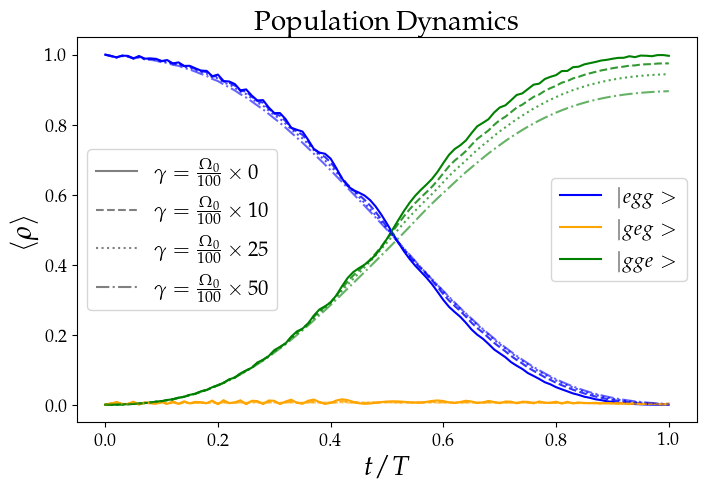

In [392]:
plt.figure(123, figsize=(8,5))
line1, = plt.plot(time_ls, populations2[0,:,4], label=r"$|egg>$", color='blue')
line2, = plt.plot(time_ls, populations2[0,:,2], label=r"$|geg>$", color='orange')
line3, = plt.plot(time_ls, populations2[0,:,1], label=r"$|gge>$", color='green')
plt.plot(time_ls, populations2[1,:,4], color='blue',linestyle="--", alpha=0.8)
plt.plot(time_ls, populations2[1,:,2], color='orange',linestyle="--", alpha=0.8)
plt.plot(time_ls, populations2[1,:,1], color='green',linestyle="--", alpha=0.8)
plt.plot(time_ls, populations2[2,:,4], color='blue', linestyle=":", alpha=0.7)
plt.plot(time_ls, populations2[2,:,2], color='orange', linestyle=":", alpha=0.7)
plt.plot(time_ls, populations2[2,:,1], color='green', linestyle=":", alpha=0.7)
plt.plot(time_ls, populations2[3,:,4], color='blue', linestyle="-.",alpha=0.6)
plt.plot(time_ls, populations2[3,:,2], color='orange', linestyle="-.",alpha=0.6)
plt.plot(time_ls, populations2[3,:,1], color='green', linestyle="-.",alpha=0.6)
line4, = plt.plot([], label=r"$\gamma = \frac{\Omega_0}{100}\times 0$", color="grey")
line5, = plt.plot([], label=r"$\gamma = \frac{\Omega_0}{100}\times 10$", linestyle="--", color="grey")
line6, = plt.plot([], label=r"$\gamma = \frac{\Omega_0}{100}\times 25$", linestyle=":", color="grey")
line7, = plt.plot([], label=r"$\gamma = \frac{\Omega_0}{100}\times 50$", linestyle="-.", color="grey")

first_legend = plt.legend(handles=[line1, line2,line3], loc='center right', fontsize=15)

plt.gca().add_artist(first_legend)

plt.legend(handles=[line4,line5,line6,line7], loc='center left', fontsize=15)

plt.title(r"Population Dynamics", fontsize=20)
plt.ylabel(r"$\langle\rho\rangle$", fontsize=20)
plt.xlabel(r"$t/T$", fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("Q_R_Q_Population_Dynamics", dpi=600, layout="tight")

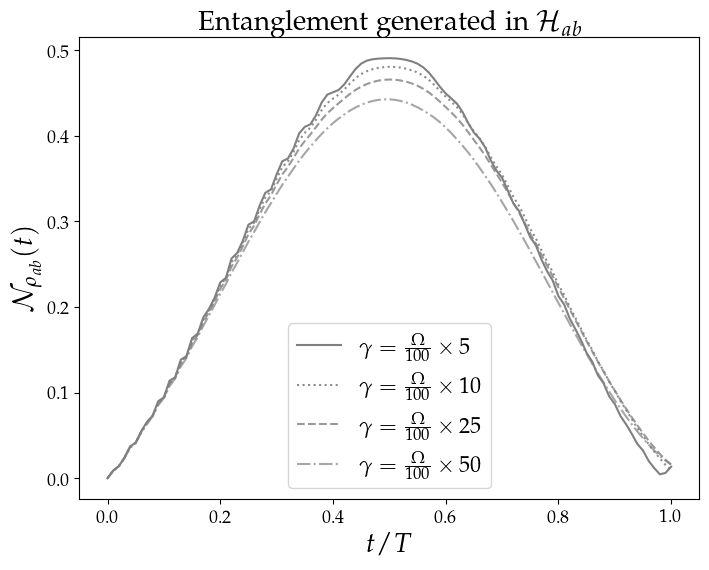

In [393]:
plt.figure(111, figsize=(8,6))
plt.plot(time_ls, negativity[0,:], color="grey", alpha=1, label=r"$\gamma = \frac{\Omega}{100} \times 5$")
plt.plot(time_ls, negativity[1,:], color="grey", alpha=0.9, linestyle=":", label=r"$\gamma = \frac{\Omega}{100} \times 10$")
plt.plot(time_ls, negativity[2,:], color="grey", alpha=0.8, linestyle="--", label=r"$\gamma = \frac{\Omega}{100} \times 25$")
plt.plot(time_ls, negativity[3,:], color="grey", alpha=0.7, linestyle="-.", label=r"$\gamma = \frac{\Omega}{100} \times 50$")
plt.title(r"Entanglement generated in $\mathcal{H}_{ab}$", fontsize=20)
plt.ylabel(r"$\mathcal{N}_{\rho_{ab}}(t)$", fontsize=20)
plt.xlabel(r"$t/T$", fontsize=20)
plt.legend(fontsize=16)
plt.tick_params(labelsize=13)
plt.savefig("Q_R_Q_Negativity", dpi=600, layout="tight")

In [394]:
index = np.argmax(negativity[0,:])
gamma_vals = np.array([0,10,25,50])
for j in range(4):
    index = np.argmax(negativity[j,:])
    rho = reduced_qubit_states[j,index]
    print(r"$\gamma = ${}".format(gamma_vals[j]), "Negativity: ", negativity[j,index], "Fidelity: ", 
      qt.fidelity(rho, qt.ket2dm(qt.bell_state('11'))))

$\gamma = $0 Negativity:  0.49051381283164086 Fidelity:  0.9952345889786258
$\gamma = $10 Negativity:  0.48039811542063804 Fidelity:  0.9900866487733894
$\gamma = $25 Negativity:  0.46561144608151317 Fidelity:  0.9824982302182874
$\gamma = $50 Negativity:  0.442446883847584 Fidelity:  0.9702759518492627
